<a href="https://colab.research.google.com/github/Sohni-Arunima/CODSOFT/blob/main/TASK_5_CODSOFT_INTERNSHIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK-5:CREDIT CARD FRAUD DETECTION**

1.   Author: Maroju Sohni Arunima

2.   Batch:Feburary-2025

3.   Domain:Data Science

4.   Aim:To build a model to detect credit card fraud



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [5]:
df=pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [15]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [16]:
df.duplicated().sum()

1081

In [17]:
df.drop_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [18]:
df["Class"].value_counts()

,count
Class,
0,284315
1,492


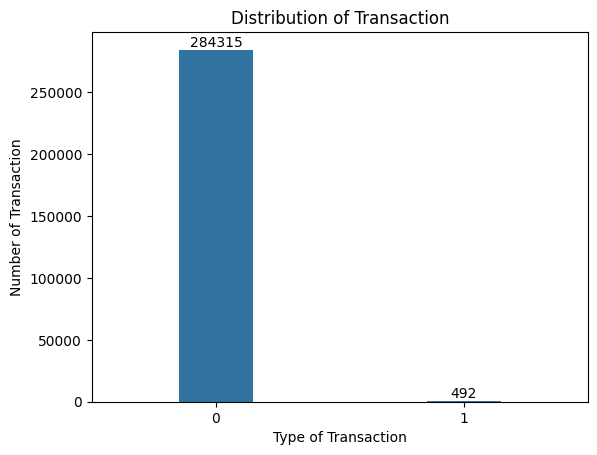

In [20]:
ax=sb.countplot(data=df,x="Class",width=0.3)
ax.set_title("Distribution of Transaction")
plt.xlabel("Type of Transaction")
plt.ylabel("Number of Transaction")

for i in ax.containers:
  ax.bar_label(i)
  plt.show()

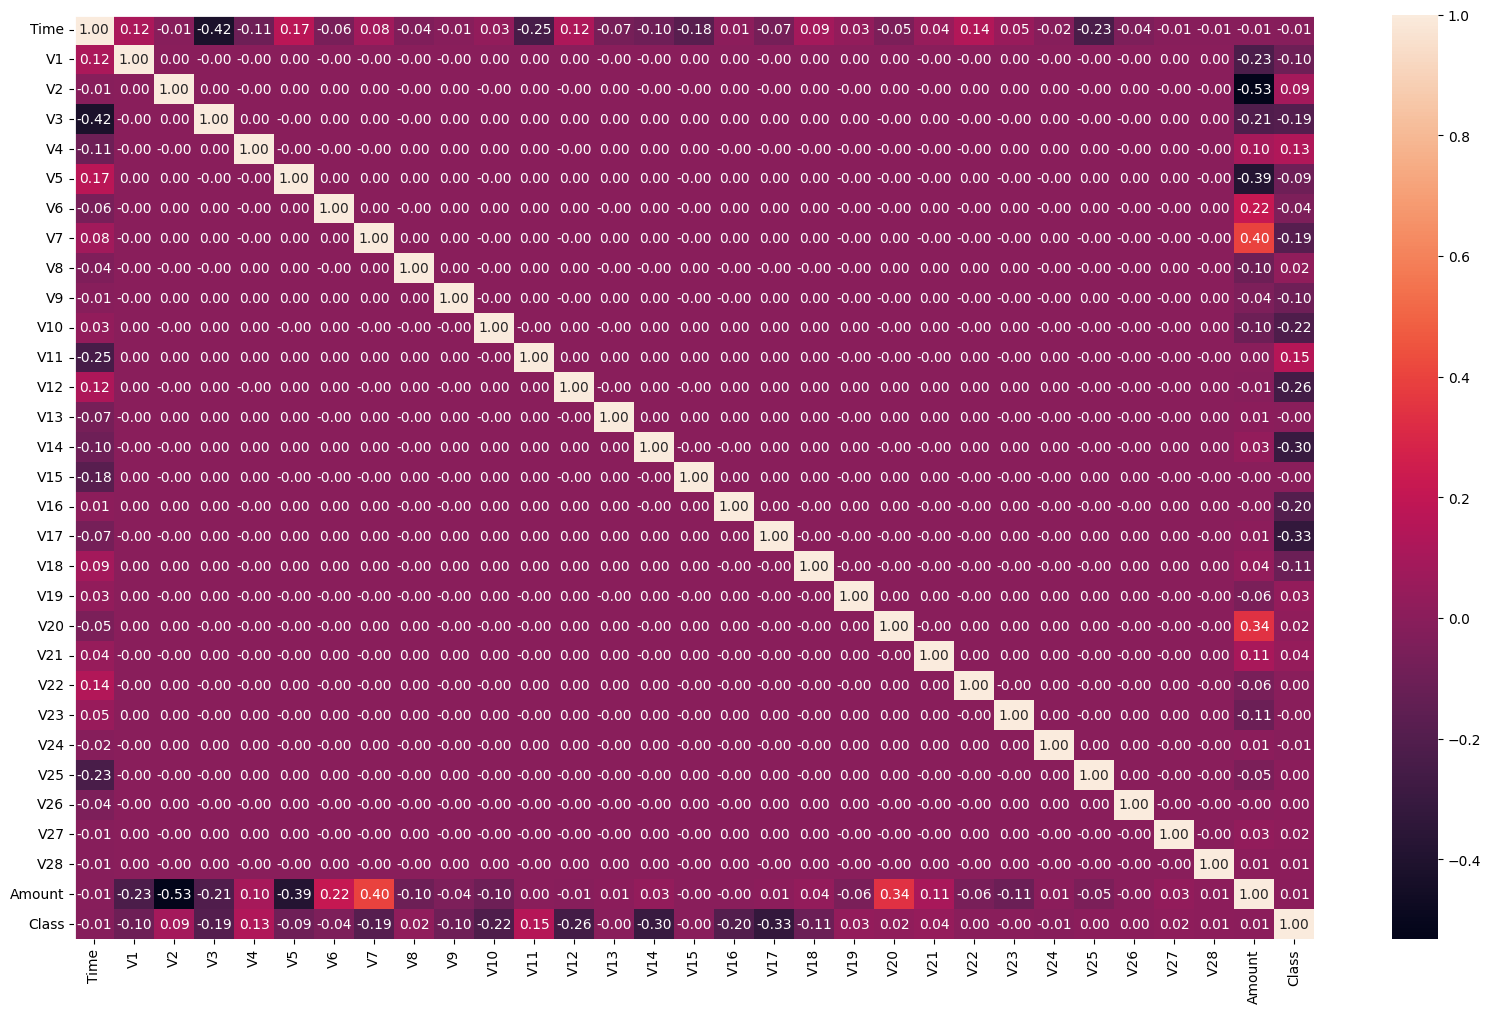

In [24]:
plt.figure(figsize=(20,12))
ax=sb.heatmap(df.corr(),annot=True,fmt='.2f')
for i in range(df.shape[1]+1):
  ax.axvline(i,color='white',lw=2)
  ax.axhline(i,color='white',lw=2)
  plt.show()

In [35]:
def split_data_by_class(df):
  legit=df[df["Class"]==0]
  fraud=df[df["Class"]==1]
  return legit,fraud

# Call the function and assign the returned values
legit_df, fraud_df = split_data_by_class(df)  # This is now outside the function

# Now you can use legit_df and fraud_df
legit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 284315 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284315 non-null  float64
 1   V1      284315 non-null  float64
 2   V2      284315 non-null  float64
 3   V3      284315 non-null  float64
 4   V4      284315 non-null  float64
 5   V5      284315 non-null  float64
 6   V6      284315 non-null  float64
 7   V7      284315 non-null  float64
 8   V8      284315 non-null  float64
 9   V9      284315 non-null  float64
 10  V10     284315 non-null  float64
 11  V11     284315 non-null  float64
 12  V12     284315 non-null  float64
 13  V13     284315 non-null  float64
 14  V14     284315 non-null  float64
 15  V15     284315 non-null  float64
 16  V16     284315 non-null  float64
 17  V17     284315 non-null  float64
 18  V18     284315 non-null  float64
 19  V19     284315 non-null  float64
 20  V20     284315 non-null  float64
 21  V21     284315 

In [36]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 541 to 281674
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    492 non-null    float64
 1   V1      492 non-null    float64
 2   V2      492 non-null    float64
 3   V3      492 non-null    float64
 4   V4      492 non-null    float64
 5   V5      492 non-null    float64
 6   V6      492 non-null    float64
 7   V7      492 non-null    float64
 8   V8      492 non-null    float64
 9   V9      492 non-null    float64
 10  V10     492 non-null    float64
 11  V11     492 non-null    float64
 12  V12     492 non-null    float64
 13  V13     492 non-null    float64
 14  V14     492 non-null    float64
 15  V15     492 non-null    float64
 16  V16     492 non-null    float64
 17  V17     492 non-null    float64
 18  V18     492 non-null    float64
 19  V19     492 non-null    float64
 20  V20     492 non-null    float64
 21  V21     492 non-null    float64
 22  V2

In [37]:
legit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284315.0,94838.202258,47484.015786,0.000000,54230.000000,84711.000000,139333.000000,172792.000000
V1,284315.0,0.008258,1.929814,-56.407510,-0.917544,0.020023,1.316218,2.454930
V2,284315.0,-0.006271,1.636146,-72.715728,-0.599473,0.064070,0.800446,18.902453
V3,284315.0,0.012171,1.459429,-48.325589,-0.884541,0.182158,1.028372,9.382558
V4,284315.0,-0.007860,1.399333,-5.683171,-0.850077,-0.022405,0.737624,16.875344
V5,284315.0,0.005453,1.356952,-113.743307,-0.689398,-0.053457,0.612181,34.801666
V6,284315.0,0.002419,1.329913,-26.160506,-0.766847,-0.273123,0.399619,73.301626
V7,284315.0,0.009637,1.178812,-31.764946,-0.551442,0.041138,0.571019,120.589494
V8,284315.0,-0.000987,1.161283,-73.216718,-0.208633,0.022041,0.326200,18.709255
V9,284315.0,0.004467,1.089372,-6.290730,-0.640412,-0.049964,0.598230,15.594995


In [38]:
fraud_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,492.0,80746.806911,47835.365138,406.000000,41241.500000,75568.500000,128483.000000,170348.000000
V1,492.0,-4.771948,6.783687,-30.552380,-6.036063,-2.342497,-0.419200,2.132386
V2,492.0,3.623778,4.291216,-8.402154,1.188226,2.717869,4.971257,22.057729
V3,492.0,-7.033281,7.110937,-31.103685,-8.643489,-5.075257,-2.276185,2.250210
V4,492.0,4.542029,2.873318,-1.313275,2.373050,4.177147,6.348729,12.114672
V5,492.0,-3.151225,5.372468,-22.105532,-4.792835,-1.522962,0.214562,11.095089
V6,492.0,-1.397737,1.858124,-6.406267,-2.501511,-1.424616,-0.413216,6.474115
V7,492.0,-5.568731,7.206773,-43.557242,-7.965295,-3.034402,-0.945954,5.802537
V8,492.0,0.570636,6.797831,-41.044261,-0.195336,0.621508,1.764879,20.007208
V9,492.0,-2.581123,2.500896,-13.434066,-3.872383,-2.208768,-0.787850,3.353525


In [39]:
new_legit_df=legit_df.sample(n=492)

In [40]:
print(new_legit_df)

            Time        V1        V2        V3        V4        V5        V6  \
278821  168459.0 -0.482126 -1.791133  1.240609 -1.744395 -0.426119 -0.230465   
181906  125172.0  1.928140 -1.297304 -0.738072 -1.616106 -0.519879  0.972493   
7266      9659.0  1.173540  0.372273  0.440919  0.729904 -0.045515 -0.227947   
261772  160175.0 -1.009547 -0.413664  1.346031 -2.246302 -0.134352 -0.256993   
107470   70448.0  0.996653 -0.386152  1.288638  0.847569 -1.165851 -0.069497   
...          ...       ...       ...       ...       ...       ...       ...   
66674    52165.0  1.113866 -0.220896  1.116141  0.617806 -0.626122  0.690578   
7227      9519.0 -1.265655  1.757645  1.545024  0.878105  0.346507 -0.484966   
173606  121561.0  2.111950 -0.067018 -1.353548  0.253723  0.193333 -0.818648   
202663  134435.0 -0.426116  0.391218 -2.001749 -0.072814  0.003499 -1.229515   
194461  130592.0  2.003455 -0.177419 -1.719467  0.632259  0.131749 -1.296748   

              V7        V8        V9  .

In [41]:
combine_df=pd.concat([new_legit_df,fraud_df],axis=0)

In [42]:
combine_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
278821,168459.0,-0.482126,-1.791133,1.240609,-1.744395,-0.426119,-0.230465,-0.662119,-0.056432,-1.630423,...,-0.242401,-0.600799,0.587571,0.493363,-0.940616,-0.414425,-0.011912,-0.002188,131.90,0
181906,125172.0,1.928140,-1.297304,-0.738072,-1.616106,-0.519879,0.972493,-1.176248,0.413936,-0.082404,...,-0.426730,-0.732394,0.529000,-1.453665,-1.064325,0.586714,0.004219,-0.061805,48.60,0
7266,9659.0,1.173540,0.372273,0.440919,0.729904,-0.045515,-0.227947,-0.182682,-0.001934,1.044993,...,-0.358274,-0.784844,0.157089,-0.081604,0.092507,0.068033,-0.036745,0.010922,1.79,0
261772,160175.0,-1.009547,-0.413664,1.346031,-2.246302,-0.134352,-0.256993,0.734770,-0.081936,-1.294410,...,0.309236,0.458398,-0.040772,0.753527,0.858965,-0.180451,-0.057895,0.067278,163.00,0
107470,70448.0,0.996653,-0.386152,1.288638,0.847569,-1.165851,-0.069497,-0.606991,0.165130,0.587532,...,0.018202,0.079570,-0.019344,0.586032,0.186337,0.278475,0.003620,0.031483,74.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [43]:
combine_df["Class"].value_counts()

,count
Class,
0,492
1,492


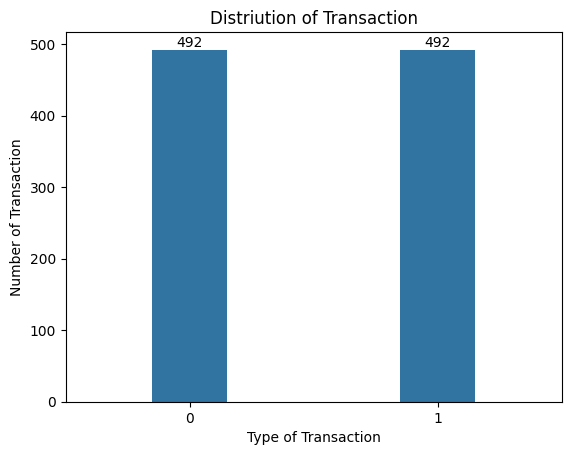

In [44]:
ax=sb.countplot(data=combine_df,x="Class",width=0.3)
ax.set_title("Distriution of Transaction")
plt.xlabel("Type of Transaction")
plt.ylabel("Number of Transaction")

for i in ax.containers:
  ax.bar_label(i)

  plt.show()

In [45]:
x=combine_df.drop(columns="Class",axis=1)
y=combine_df["Class"]

In [46]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
278821,168459.0,-0.482126,-1.791133,1.240609,-1.744395,-0.426119,-0.230465,-0.662119,-0.056432,-1.630423,...,0.276113,-0.242401,-0.600799,0.587571,0.493363,-0.940616,-0.414425,-0.011912,-0.002188,131.90
181906,125172.0,1.928140,-1.297304,-0.738072,-1.616106,-0.519879,0.972493,-1.176248,0.413936,-0.082404,...,-0.569840,-0.426730,-0.732394,0.529000,-1.453665,-1.064325,0.586714,0.004219,-0.061805,48.60
7266,9659.0,1.173540,0.372273,0.440919,0.729904,-0.045515,-0.227947,-0.182682,-0.001934,1.044993,...,-0.140675,-0.358274,-0.784844,0.157089,-0.081604,0.092507,0.068033,-0.036745,0.010922,1.79
261772,160175.0,-1.009547,-0.413664,1.346031,-2.246302,-0.134352,-0.256993,0.734770,-0.081936,-1.294410,...,0.517903,0.309236,0.458398,-0.040772,0.753527,0.858965,-0.180451,-0.057895,0.067278,163.00
107470,70448.0,0.996653,-0.386152,1.288638,0.847569,-1.165851,-0.069497,-0.606991,0.165130,0.587532,...,0.064176,0.018202,0.079570,-0.019344,0.586032,0.186337,0.278475,0.003620,0.031483,74.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [47]:
y


,Class
278821,0
181906,0
7266,0
261772,0
107470,0
...,...
279863,1
280143,1
280149,1
281144,1


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)

In [50]:
print(x_train)

            Time        V1        V2        V3        V4        V5        V6  \
264977  161676.0 -2.095268 -0.113154  0.839074 -1.434403 -0.665841 -0.353520   
137995   82434.0 -1.488333  0.836235  0.429964  0.180140 -0.080438  0.316467   
52674    45582.0  1.228042 -0.757735 -0.213433 -0.824381 -0.541460 -0.289363   
42007    40918.0 -3.140260  3.367342 -2.778931  3.859701 -1.159518 -0.721552   
230476  146344.0 -0.099724  2.795414 -6.423856  3.247513 -1.632290 -2.766665   
...          ...       ...       ...       ...       ...       ...       ...   
100191   67446.0 -0.419663  0.841833  1.266375  0.840547  0.441625  0.304874   
229015  145765.0  2.016002 -0.007963 -1.850083  0.566969  0.321861 -0.581601   
88897    62341.0 -5.267760  2.506719 -5.290925  4.886134 -3.343188 -1.100085   
11698    19977.0 -0.894851 -0.524652  1.844461  0.096130 -1.316078  0.454635   
191544  129308.0  0.054682  1.856500 -4.075451  4.100098 -0.800931 -0.292502   

              V7        V8        V9  .

In [51]:
print(x_train.shape,x_test.shape)

(738, 30) (246, 30)


In [52]:
model=LogisticRegression()

In [53]:
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
x_train_predict=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_predict,y_train)
print(f"The models training accuracy is: {round(training_data_accuracy * 100,2)}%")

The models training accuracy is: 95.12%


In [55]:
x_test_predict=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_predict,y_test)
print(f"The models test accuracy is: {round(test_data_accuracy * 100,2)}%")

The models test accuracy is: 95.12%


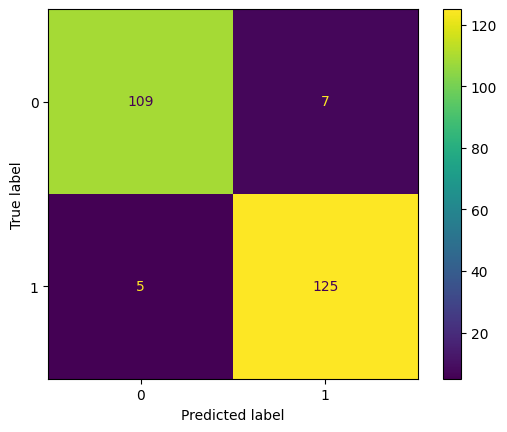

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay  # Import ConfusionMatrixDisplay

# ... (your other code) ...

ax = ConfusionMatrixDisplay.from_predictions(y_test, x_test_predict)
plt.show()